In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [ ]:
regular_feature_path = "/content/drive/MyDrive/ML_project_dataset/Normalized_Features_1/"
new_feature_path = "/content/drive/MyDrive/ML_project_dataset/Final_Normalized_Features/"

In [ ]:
country_name_list = ['Belgium_features.csv','England_features.csv','France_features.csv',
                     'Germany_features.csv','Greece_features.csv','Italy_features.csv',
                     'Netherlands_features.csv','Portugal_features.csv',
                     'Scotland_features.csv','Spain_features.csv']
countries_regular = ['Belgium', 'England','France', 'Germany', 'Greece', 'Italy', 'Netherlands', 'Portugal',
                     'Scotland', 'Spain']

## Regular data Neural Net

In [ ]:
transfer_df = pd.read_csv("/content/drive/MyDrive/ML_project_dataset/transfers_data.csv")

In [ ]:
transfer_df.columns

Index(['Unnamed: 0', 'Name', 'Position', 'Age', 'Team_from', 'League_from',
       'Team_to', 'League_to', 'Season', 'Transfer_fee', 'Country Column',
       'Nationality'],
      dtype='object')

list for the country csv names

In [ ]:
eng_feature_df = pd.read_csv(regular_feature_path + "England_features.csv")

In [ ]:
#converting output column to integer type for classification
eng_feature_df["win"] = eng_feature_df["win"].astype('int')

In [ ]:
eng_feature_df.head(5)

,Unnamed: 0,team_rank,rank_diff,win_rate,Team_Venue_Form,Opp_Venue_Form,Team_Cumul_GD,Opp_Cumul_GD,win
0,0,1.0,0.009217,0.0,0.583333,0.466667,0.611111,0.604167,0
1,1,1.0,0.000000,0.2,0.416667,0.600000,0.277778,0.791667,0
2,2,1.0,0.152074,0.0,0.416667,0.533333,0.277778,0.583333,1
3,3,1.0,0.543779,0.0,0.500000,0.266667,0.333333,0.520833,1
4,4,1.0,0.023041,0.5,0.250000,0.533333,0.277778,0.666667,0


In [ ]:
X = eng_feature_df[['team_rank', 'rank_diff', 'win_rate', 'Team_Venue_Form', 'Opp_Venue_Form', 'Team_Cumul_GD', 'Opp_Cumul_GD']]
y = eng_feature_df['win']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X.shape

(227, 7)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
loss_fn = keras.losses.BinaryCrossentropy()
model.compile(loss=loss_fn, optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 1s 11ms/step - loss: 0.7537 - accuracy: 0.3958 - val_loss: 0.7058 - val_accuracy: 0.4595
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7257 - accuracy: 0.3819 - val_loss: 0.6980 - val_accuracy: 0.5135
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7126 - accuracy: 0.3542 - val_loss: 0.6940 - val_accuracy: 0.5946
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7032 - accuracy: 0.3681 - val_loss: 0.6935 - val_accuracy: 0.5135
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.4097 - val_loss: 0.6928 - val_accuracy: 0.3784
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5417 - val_loss: 0.6928 - val_accuracy: 0.5405
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.6250 - val_loss: 0.6924 - val_accuracy: 0.5135
Epoch 8/100


In [ ]:
max(history.history['val_accuracy'])

0.7567567825317383

In [ ]:
# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

2/2 [==============================] - 0s 4ms/step - loss: 0.5478 - accuracy: 0.7174
Test results - Loss: 0.547821044921875 - Accuracy: 71.7391312122345%


## Here are the new transfer features:

In [ ]:
eng_new_feature_df = pd.read_csv(new_feature_path + "England_features.csv")
eng_new_feature_df['win'] = eng_new_feature_df['win'].astype('int')

In [ ]:
eng_new_feature_df.head(5)

,Unnamed: 0,team_rank,rank_diff,win_rate,Team_Venue_Form,Opp_Venue_Form,Team_Cumul_GD,Opp_Cumul_GD,Total_exp,Total_Exp_local,Total_Exp_youth,win
0,0,1.0,0.009217,0.0,0.583333,0.466667,0.611111,0.604167,0.156965,0.360352,0.237738,0
1,1,1.0,0.000000,0.2,0.416667,0.600000,0.277778,0.791667,0.156965,0.360352,0.237738,0
2,2,1.0,0.152074,0.0,0.416667,0.533333,0.277778,0.583333,0.156965,0.360352,0.237738,1
3,3,1.0,0.543779,0.0,0.500000,0.266667,0.333333,0.520833,0.156965,0.360352,0.237738,1
4,4,1.0,0.023041,0.5,0.250000,0.533333,0.277778,0.666667,0.156965,0.360352,0.237738,0


In [ ]:
eng_new_feature_df.columns

Index(['Unnamed: 0', 'team_rank', 'rank_diff', 'win_rate', 'Team_Venue_Form',
       'Opp_Venue_Form', 'Team_Cumul_GD', 'Opp_Cumul_GD', 'Total_exp',
       'Total_Exp_local', 'Total_Exp_youth', 'win'],
      dtype='object')

In [ ]:
X_new = eng_new_feature_df[eng_new_feature_df.columns[1:-1]]
y_new = eng_new_feature_df['win']

In [ ]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new, y_new, test_size=0.2)

In [ ]:
X_new.shape

(227, 10)

In [ ]:
model_new = Sequential()
model_new.add(Dense(12, input_dim=X_new.shape[1], activation='relu'))
model_new.add(Dense(8, activation='relu'))
model_new.add(Dense(1, activation='sigmoid'))
loss_fn = keras.losses.BinaryCrossentropy()
model_new.compile(loss=loss_fn, optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_new = model_new.fit(Xn_train, yn_train, epochs=200, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/200
29/29 [==============================] - 1s 8ms/step - loss: 0.6788 - accuracy: 0.6181 - val_loss: 0.6435 - val_accuracy: 0.6216
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6458 - val_loss: 0.6324 - val_accuracy: 0.7838
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6458 - val_loss: 0.6251 - val_accuracy: 0.7568
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 0.6363 - accuracy: 0.6667 - val_loss: 0.6162 - val_accuracy: 0.7568
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6736 - val_loss: 0.6079 - val_accuracy: 0.7568
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.6528 - val_loss: 0.6009 - val_accuracy: 0.7568
Epoch 7/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6129 - accuracy: 0.6806 - val_loss: 0.5883 - val_accuracy: 0.7568
Epoch 8/200
2

In [ ]:
test_results_new = model_new.evaluate(Xn_test, yn_test, verbose=1)
print(f'Test results - Loss: {test_results_new[0]} - Accuracy: {test_results_new[1]*100}%')

2/2 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.7174
Test results - Loss: 0.6433664560317993 - Accuracy: 71.7391312122345%


## creating a function to create a model and fitting that particular data with the file path in it.

In [ ]:
def get_model(file_path, verbose, new_bool, epochs):
    df_here = pd.read_csv(file_path)
    df_here['win'] = df_here['win'].astype('int')
    X = df_here[df_here.columns[1:-1]]
    y = df_here['win']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    model = Sequential()
    if(not new_bool):
        model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    else:
        model.add(Dense(14, input_dim=X.shape[1], activation='relu'))
        model.add(Dense(9, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    loss_fn = keras.losses.BinaryCrossentropy()
    model.compile(loss=loss_fn, optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=5, verbose=verbose, validation_split=0.2)
    test_results = model.evaluate(X_test, y_test, verbose=1)
    print('=============================\n')
    print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
    return model, history, test_results

In [ ]:
check_model = get_model('/content/drive/MyDrive/ML_project_dataset/Final_Normalized_Features/England_features.csv')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 1s 9ms/step - loss: 0.6603 - accuracy: 0.6042 - val_loss: 0.6697 - val_accuracy: 0.5135
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.6042 - val_loss: 0.6644 - val_accuracy: 0.5135
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6111 - val_loss: 0.6631 - val_accuracy: 0.5135
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.5972 - val_loss: 0.6582 - val_accuracy: 0.5676
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.6111 - val_loss: 0.6623 - val_accuracy: 0.5135
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.5972 - val_loss: 0.6540 - val_accuracy: 0.5946
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.6597 - val_loss: 0.6519 - val_accuracy: 0.7027
Epoch 8/100
29/29 [======

In [ ]:
check_model_old = get_model('/content/drive/MyDrive/ML_project_dataset/Final_Normalized_Features/England_features.csv')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 1s 9ms/step - loss: 0.6808 - accuracy: 0.5556 - val_loss: 0.6621 - val_accuracy: 0.5946
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.5556 - val_loss: 0.6517 - val_accuracy: 0.5946
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.5625 - val_loss: 0.6426 - val_accuracy: 0.5946
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.5625 - val_loss: 0.6371 - val_accuracy: 0.5946
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.5556 - val_loss: 0.6308 - val_accuracy: 0.5946
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.5833 - val_loss: 0.6230 - val_accuracy: 0.6216
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.7153 - val_loss: 0.6148 - val_accuracy: 0.5946
Epoch 8/100
29/29 [======

## Now checking for all the datasets and creating separate dictionaries with models and the values for training and testing accuracy.

In [ ]:

def get_final_results(regular_path, new_path, country_list, countries_regular):
    regular_data_dict = {}      #storing accuracy for training and testing
    regular_model_dict = {}
    regular_data_dict['country'] = countries_regular
    regular_data_dict['train acc'] = []
    regular_data_dict['test loss'] = []
    regular_data_dict['test acc'] = []
    for country in country_list:
        path_here = regular_path + country
        model, history, test_results = get_model(path_here, 0, 0, 150)
        regular_model_dict[country[:country.find('_')]] = model
        regular_data_dict['train acc'].append(max(history.history['val_accuracy']))
        regular_data_dict['test loss'].append(test_results[0])
        regular_data_dict['test acc'].append(test_results[1]*100)

    new_data_dict = {}      #storing accuracy for training and testing
    new_model_dict = {}
    new_data_dict['country'] = countries_regular
    new_data_dict['train acc'] = []
    new_data_dict['test loss'] = []
    new_data_dict['test acc'] = []
    for country in country_list:
        path_here = new_path + country
        model, history, test_results = get_model(path_here, 0, 1, 250)
        new_model_dict[country[:country.find('_')]] = model
        new_data_dict['train acc'].append(max(history.history['val_accuracy']))
        new_data_dict['test loss'].append(test_results[0])
        new_data_dict['test acc'].append(test_results[1]*100)
    
    return regular_data_dict, regular_model_dict, new_data_dict, new_model_dict

In [ ]:
regular_data_dict, regular_model_dict, new_data_dict, new_model_dict = get_final_results(regular_feature_path, new_feature_path, country_name_list, countries_regular)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 18ms/step - loss: 0.4020 - accuracy: 0.8387

Test results - Loss: 0.40195009112358093 - Accuracy: 83.87096524238586%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 0.4015 - accuracy: 0.8286

Test results - Loss: 0.40148410201072693 - Accuracy: 82.85714387893677%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 0.7819 - accuracy: 0.6667

Test results - Loss: 0.7818692326545715 - Accuracy: 66.66666865348816%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5812 - accuracy: 0.7250

Test results - Loss: 0.5811710953712463 - Accuracy: 72.50000238418579%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 114ms/step - loss: 0.7538 - accuracy: 0.5312

Test results - Loss: 0.7537935972213745 - Accuracy: 53.125%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.5934 - accuracy: 0.6757

Test results - Loss: 0.5934443473815918 - Accuracy: 67.56756901741028%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 0.6947 - accuracy: 0.6000

Test results - Loss: 0.6947205662727356 - Accuracy: 60.00000238418579%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.8001 - accuracy: 0.6757

Test results - Loss: 0.8001019954681396 - Accuracy: 67.56756901741028%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 20ms/step - loss: 0.5646 - accuracy: 0.6800

Test results - Loss: 0.5645695924758911 - Accuracy: 68.00000071525574%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.7368

Test results - Loss: 0.5380842089653015 - Accuracy: 73.68420958518982%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 19ms/step - loss: 0.5697 - accuracy: 0.6774

Test results - Loss: 0.5696609020233154 - Accuracy: 67.7419364452362%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.8498 - accuracy: 0.6000

Test results - Loss: 0.8498289585113525 - Accuracy: 60.00000238418579%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 0.7535 - accuracy: 0.5385

Test results - Loss: 0.7534905672073364 - Accuracy: 53.84615659713745%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.9183 - accuracy: 0.6000

Test results - Loss: 0.9182685613632202 - Accuracy: 60.00000238418579%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 107ms/step - loss: 0.6567 - accuracy: 0.7188

Test results - Loss: 0.6567495465278625 - Accuracy: 71.875%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 1.0523 - accuracy: 0.5405

Test results - Loss: 1.0523451566696167 - Accuracy: 54.054051637649536%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.7035 - accuracy: 0.6286

Test results - Loss: 0.7034599184989929 - Accuracy: 62.85714507102966%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.7309 - accuracy: 0.6216

Test results - Loss: 0.7308675646781921 - Accuracy: 62.162160873413086%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 20ms/step - loss: 0.8162 - accuracy: 0.7200

Test results - Loss: 0.8161890506744385 - Accuracy: 72.00000286102295%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.8873 - accuracy: 0.6053

Test results - Loss: 0.8873383402824402 - Accuracy: 60.52631735801697%


In [ ]:
regular_data_dict.keys()

dict_keys(['country', 'train acc', 'test loss', 'test acc'])

In [ ]:
len(regular_data_dict['test loss'])

10

In [ ]:
regular_table = pd.DataFrame.from_dict(regular_data_dict)

In [ ]:
new_table = pd.DataFrame.from_dict(new_data_dict)

In [ ]:
regular_table

,country,train acc,test loss,test acc
0,Belgium,0.617647,0.401950,83.870965
1,England,0.692308,0.401484,82.857144
2,France,0.688889,0.781869,66.666669
3,Germany,0.630435,0.581171,72.500002
4,Greece,0.666667,0.753794,53.125000
5,Italy,0.658537,0.593444,67.567569
6,Netherlands,0.675000,0.694721,60.000002
7,Portugal,0.785714,0.800102,67.567569
8,Scotland,0.714286,0.564570,68.000001
9,Spain,0.744186,0.538084,73.684210


In [ ]:
new_table

,country,train acc,test loss,test acc
0,Belgium,0.823529,0.569661,67.741936
1,England,0.717949,0.849829,60.000002
2,France,0.711111,0.753491,53.846157
3,Germany,0.630435,0.918269,60.000002
4,Greece,0.777778,0.656750,71.875000
5,Italy,0.682927,1.052345,54.054052
6,Netherlands,0.675000,0.703460,62.857145
7,Portugal,0.714286,0.730868,62.162161
8,Scotland,0.857143,0.816189,72.000003
9,Spain,0.790698,0.887338,60.526317


## Ablation testing:

In [ ]:
def get_results_one_count(path_type, country_name, epochs, verbose):
    df_here = pd.read_csv(path_type + country_name)
    df_here['win'] = df_here['win'].astype('int')
    column_names = df_here.columns[1:-1]
    ablation_dict = {}
    ablation_dict['feature'] = column_names
    ablation_dict['train acc'] = []
    ablation_dict['test loss'] = []
    ablation_dict['test acc'] = []
    for feature in column_names:
        df_here = pd.read_csv(path_type + country_name)
        df_here['win'] = df_here['win'].astype('int')
        X = df_here[df_here.columns[1:-1]]
        del X[feature]
        y = df_here['win']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
        model = Sequential()
        model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        loss_fn = keras.losses.BinaryCrossentropy()
        model.compile(loss=loss_fn, optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=5, verbose=verbose, validation_split=0.2)
        test_results = model.evaluate(X_test, y_test, verbose=1)
        ablation_dict['train acc'].append(max(history.history['val_accuracy']))
        ablation_dict['test loss'].append(test_results[0])
        ablation_dict['test acc'].append(test_results[1]*100)
    return ablation_dict


In [ ]:
ablation_dict = get_results_one_count(regular_feature_path, 'England_features.csv', 150, 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.4974 - accuracy: 0.7714


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.6427 - accuracy: 0.6286


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.5002 - accuracy: 0.7714


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.8249 - accuracy: 0.6286


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.5495 - accuracy: 0.7714


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5515 - accuracy: 0.6571


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5569 - accuracy: 0.7429


In [ ]:
ablation_table = pd.DataFrame.from_dict(ablation_dict)
ablation_table

,feature,train acc,test loss,test acc
0,team_rank,0.717949,0.497418,77.142859
1,rank_diff,0.564103,0.642654,62.857145
2,win_rate,0.769231,0.500172,77.142859
3,Team_Venue_Form,0.769231,0.824871,62.857145
4,Opp_Venue_Form,0.846154,0.549460,77.142859
5,Team_Cumul_GD,0.717949,0.551458,65.714288
6,Opp_Cumul_GD,0.692308,0.556918,74.285716


In [ ]:
for country in country_name_list:
    ablation_dict = get_results_one_count(regular_feature_path, country, 150, 0)
    ablation_table = pd.DataFrame.from_dict(ablation_dict)
    print(country[:country.find('_')])
    print(ablation_table)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 19ms/step - loss: 0.6601 - accuracy: 0.5806


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 19ms/step - loss: 0.7417 - accuracy: 0.5484


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 19ms/step - loss: 0.4881 - accuracy: 0.7097


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 18ms/step - loss: 0.6858 - accuracy: 0.6129


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 19ms/step - loss: 0.5196 - accuracy: 0.7419


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 21ms/step - loss: 0.6851 - accuracy: 0.6452


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 20ms/step - loss: 0.7072 - accuracy: 0.6129
Belgium
           feature  train acc  test loss   test acc
0        team_rank   0.764706   0.660077  58.064514
1        rank_diff   0.676471   0.741694  54.838711
2         win_rate   0.676471   0.488085  70.967740
3  Team_Venue_Form   0.617647   0.685824  61.290324
4   Opp_Venue_Form   0.735294   0.519644  74.193549
5    Team_Cumul_GD   0.794118   0.685079  64.516127
6     Opp_Cumul_GD   0.823529   0.707202  61.290324


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.4717 - accuracy: 0.7714


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.7088 - accuracy: 0.6286


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.6571


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.8000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.7437 - accuracy: 0.6286


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.6574 - accuracy: 0.6857


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.4984 - accuracy: 0.8286
England
           feature  train acc  test loss   test acc
0        team_rank   0.769231   0.471735  77.142859
1        rank_diff   0.666667   0.708825  62.857145
2         win_rate   0.820513   0.641455  65.714288
3  Team_Venue_Form   0.666667   0.562311  80.000001
4   Opp_Venue_Form   0.743590   0.743656  62.857145
5    Team_Cumul_GD   0.769231   0.657353  68.571430
6     Opp_Cumul_GD   0.666667   0.498356  82.857144


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.5787 - accuracy: 0.6410


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.5935 - accuracy: 0.6667


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.6238 - accuracy: 0.6154


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.5684 - accuracy: 0.6667


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.7401 - accuracy: 0.6923


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.5981 - accuracy: 0.6923


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.5641
France
           feature  train acc  test loss   test acc
0        team_rank   0.688889   0.578699  64.102566
1        rank_diff   0.711111   0.593486  66.666669
2         win_rate   0.800000   0.623843  61.538464
3  Team_Venue_Form   0.733333   0.568419  66.666669
4   Opp_Venue_Form   0.666667   0.740143  69.230771
5    Team_Cumul_GD   0.755556   0.598149  69.230771
6     Opp_Cumul_GD   0.822222   0.676967  56.410259


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.5626 - accuracy: 0.6500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5484 - accuracy: 0.7250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.7281 - accuracy: 0.6500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5123 - accuracy: 0.6250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5750


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.6593 - accuracy: 0.6500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.7179 - accuracy: 0.6250
Germany
           feature  train acc  test loss   test acc
0        team_rank   0.695652   0.562578  64.999998
1        rank_diff   0.652174   0.548431  72.500002
2         win_rate   0.695652   0.728128  64.999998
3  Team_Venue_Form   0.695652   0.512317  62.500000
4   Opp_Venue_Form   0.782609   0.679242  57.499999
5    Team_Cumul_GD   0.782609   0.659339  64.999998
6     Opp_Cumul_GD   0.760870   0.717930  62.500000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 113ms/step - loss: 0.6367 - accuracy: 0.6562


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 108ms/step - loss: 0.7566 - accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 107ms/step - loss: 0.6780 - accuracy: 0.6875


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 116ms/step - loss: 0.4562 - accuracy: 0.7812


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 111ms/step - loss: 0.8120 - accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 115ms/step - loss: 0.8183 - accuracy: 0.5312


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 107ms/step - loss: 0.6861 - accuracy: 0.6562
Greece
           feature  train acc  test loss  test acc
0        team_rank   0.666667   0.636660    65.625
1        rank_diff   0.750000   0.756614    50.000
2         win_rate   0.722222   0.677958    68.750
3  Team_Venue_Form   0.694444   0.456249    78.125
4   Opp_Venue_Form   0.694444   0.812021    50.000
5    Team_Cumul_GD   0.555556   0.818311    53.125
6     Opp_Cumul_GD   0.694444   0.686109    65.625


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.7750 - accuracy: 0.4865


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.6486


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.7178 - accuracy: 0.6486


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.6433 - accuracy: 0.6216


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.8131 - accuracy: 0.4324


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.7958 - accuracy: 0.6216


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.5996 - accuracy: 0.6486
Italy
           feature  train acc  test loss   test acc
0        team_rank   0.756098   0.775019  48.648649
1        rank_diff   0.682927   0.663039  64.864862
2         win_rate   0.682927   0.717759  64.864862
3  Team_Venue_Form   0.585366   0.643350  62.162161
4   Opp_Venue_Form   0.609756   0.813134  43.243244
5    Team_Cumul_GD   0.634146   0.795761  62.162161
6     Opp_Cumul_GD   0.634146   0.599636  64.864862


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5503 - accuracy: 0.6857


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.7143


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.5733 - accuracy: 0.6571


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.7143


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.8000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 0.5483 - accuracy: 0.7429


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.5228 - accuracy: 0.6857
Netherlands
           feature  train acc  test loss   test acc
0        team_rank      0.725   0.550287  68.571430
1        rank_diff      0.800   0.612755  71.428573
2         win_rate      0.800   0.573304  65.714288
3  Team_Venue_Form      0.825   0.646291  71.428573
4   Opp_Venue_Form      0.850   0.523684  80.000001
5    Team_Cumul_GD      0.700   0.548320  74.285716
6     Opp_Cumul_GD      0.725   0.522787  68.571430


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5576 - accuracy: 0.7838


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.7717 - accuracy: 0.5405


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.6843 - accuracy: 0.6757


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.5970 - accuracy: 0.7027


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.6467 - accuracy: 0.6757


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.7421 - accuracy: 0.6216


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5494 - accuracy: 0.7568
Portugal
           feature  train acc  test loss   test acc
0        team_rank   0.690476   0.557566  78.378379
1        rank_diff   0.738095   0.771686  54.054052
2         win_rate   0.666667   0.684332  67.567569
3  Team_Venue_Form   0.761905   0.596992  70.270270
4   Opp_Venue_Form   0.714286   0.646695  67.567569
5    Team_Cumul_GD   0.666667   0.742064  62.162161
6     Opp_Cumul_GD   0.714286   0.549413  75.675678


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 22ms/step - loss: 0.6467 - accuracy: 0.6800


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 25ms/step - loss: 0.6252 - accuracy: 0.6800


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 22ms/step - loss: 0.5614 - accuracy: 0.7600


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 19ms/step - loss: 0.6616 - accuracy: 0.6000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 21ms/step - loss: 0.6297 - accuracy: 0.7200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 21ms/step - loss: 0.5490 - accuracy: 0.7200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 18ms/step - loss: 0.2926 - accuracy: 0.9200
Scotland
           feature  train acc  test loss   test acc
0        team_rank   0.750000   0.646671  68.000001
1        rank_diff   0.785714   0.625209  68.000001
2         win_rate   0.821429   0.561372  75.999999
3  Team_Venue_Form   0.857143   0.661593  60.000002
4   Opp_Venue_Form   0.750000   0.629679  72.000003
5    Team_Cumul_GD   0.785714   0.548976  72.000003
6     Opp_Cumul_GD   0.928571   0.292625  92.000002


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.7692 - accuracy: 0.6579


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.6354 - accuracy: 0.6842


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.7534 - accuracy: 0.6316


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.7005 - accuracy: 0.7105


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.6674 - accuracy: 0.6842


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.7105


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.5046 - accuracy: 0.7368
Spain
           feature  train acc  test loss   test acc
0        team_rank   0.813953   0.769163  65.789473
1        rank_diff   0.720930   0.635394  68.421054
2         win_rate   0.744186   0.753384  63.157892
3  Team_Venue_Form   0.744186   0.700509  71.052629
4   Opp_Venue_Form   0.837209   0.667443  68.421054
5    Team_Cumul_GD   0.767442   0.683748  71.052629
6     Opp_Cumul_GD   0.720930   0.504622  73.684210


### making a seperate function for the new features and checking the ablation.

In [ ]:
def get_results_one_count_new_feat(path_type, country_name, epochs, verbose):
    df_here = pd.read_csv(path_type + country_name)
    df_here['win'] = df_here['win'].astype('int')
    column_names = df_here.columns[1:-1]
    ablation_dict = {}
    ablation_dict['feature'] = column_names
    ablation_dict['train acc'] = []
    ablation_dict['test loss'] = []
    ablation_dict['test acc'] = []
    for feature in column_names:
        df_here = pd.read_csv(path_type + country_name)
        df_here['win'] = df_here['win'].astype('int')
        X = df_here[df_here.columns[1:-1]]
        del X[feature]
        y = df_here['win']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
        model = Sequential()
        model.add(Dense(14, input_dim=X.shape[1], activation='relu'))
        model.add(Dense(10, activation='relu'))
        model.add(Dense(4, activation = "relu"))
        model.add(Dense(1, activation='sigmoid'))
        loss_fn = keras.losses.BinaryCrossentropy()
        model.compile(loss=loss_fn, optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=5, verbose=verbose, validation_split=0.2)
        test_results = model.evaluate(X_test, y_test, verbose=1)
        ablation_dict['train acc'].append(max(history.history['val_accuracy']))
        ablation_dict['test loss'].append(test_results[0])
        ablation_dict['test acc'].append(test_results[1]*100)
    return ablation_dict

In [ ]:
for country in country_name_list:
    ablation_dict = get_results_one_count_new_feat(new_feature_path, country, 250, 0)
    ablation_table = pd.DataFrame.from_dict(ablation_dict)
    print(country[:country.find('_')])
    print(ablation_table)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 18ms/step - loss: 0.5746 - accuracy: 0.6452


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 17ms/step - loss: 0.8000 - accuracy: 0.5484


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 18ms/step - loss: 1.2033 - accuracy: 0.7097


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 18ms/step - loss: 1.7960 - accuracy: 0.5806


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 16ms/step - loss: 0.8773 - accuracy: 0.5806


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 17ms/step - loss: 1.1899 - accuracy: 0.5806


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 17ms/step - loss: 0.6803 - accuracy: 0.7419


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 20ms/step - loss: 0.9174 - accuracy: 0.6774


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 17ms/step - loss: 0.8336 - accuracy: 0.7742


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 19ms/step - loss: 0.5638 - accuracy: 0.7742
Belgium
           feature  train acc  test loss   test acc
0        team_rank   0.647059   0.574591  64.516127
1        rank_diff   0.617647   0.799989  54.838711
2         win_rate   0.823529   1.203344  70.967740
3  Team_Venue_Form   0.852941   1.796003  58.064514
4   Opp_Venue_Form   0.852941   0.877335  58.064514
5    Team_Cumul_GD   0.794118   1.189944  58.064514
6     Opp_Cumul_GD   0.676471   0.680318  74.193549
7        Total_exp   0.617647   0.917414  67.741936
8  Total_Exp_local   0.735294   0.833556  77.419353
9  Total_Exp_youth   0.794118   0.563824  77.419353


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.9261 - accuracy: 0.6000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.6571


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.7186 - accuracy: 0.7143


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 3ms/step - loss: 0.8743 - accuracy: 0.5429


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.8582 - accuracy: 0.6286


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.5969 - accuracy: 0.6571


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.9266 - accuracy: 0.5429


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.8855 - accuracy: 0.6571


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.7225 - accuracy: 0.6857


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.6257 - accuracy: 0.6000
England
           feature  train acc  test loss   test acc
0        team_rank   0.589744   0.926112  60.000002
1        rank_diff   0.666667   0.681245  65.714288
2         win_rate   0.769231   0.718600  71.428573
3  Team_Venue_Form   0.769231   0.874328  54.285717
4   Opp_Venue_Form   0.769231   0.858185  62.857145
5    Team_Cumul_GD   0.820513   0.596918  65.714288
6     Opp_Cumul_GD   0.820513   0.926610  54.285717
7        Total_exp   0.589744   0.885534  65.714288
8  Total_Exp_local   0.769231   0.722458  68.571430
9  Total_Exp_youth   0.743590   0.625651  60.000002


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 1.0428 - accuracy: 0.5897


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.8633 - accuracy: 0.5897


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.6396 - accuracy: 0.7436


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 1.4459 - accuracy: 0.5128


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.6289 - accuracy: 0.5897


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.6022 - accuracy: 0.7179


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.6711 - accuracy: 0.5897


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.8914 - accuracy: 0.5897


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 1.1907 - accuracy: 0.4872


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 0.8882 - accuracy: 0.4359
France
           feature  train acc  test loss   test acc
0        team_rank   0.688889   1.042783  58.974361
1        rank_diff   0.777778   0.863277  58.974361
2         win_rate   0.711111   0.639614  74.358976
3  Team_Venue_Form   0.755556   1.445856  51.282054
4   Opp_Venue_Form   0.666667   0.628907  58.974361
5    Team_Cumul_GD   0.711111   0.602170  71.794873
6     Opp_Cumul_GD   0.688889   0.671086  58.974361
7        Total_exp   0.577778   0.891438  58.974361
8  Total_Exp_local   0.733333   1.190697  48.717949
9  Total_Exp_youth   0.777778   0.888198  43.589744


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.7987 - accuracy: 0.6250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 1.2687 - accuracy: 0.5500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.5405 - accuracy: 0.7000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.5312 - accuracy: 0.7000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.9138 - accuracy: 0.6500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.6250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.9701 - accuracy: 0.5500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 2.3050 - accuracy: 0.6500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 1.0530 - accuracy: 0.4750


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.5805 - accuracy: 0.7500
Germany
           feature  train acc  test loss   test acc
0        team_rank   0.630435   0.798742  62.500000
1        rank_diff   0.717391   1.268747  55.000001
2         win_rate   0.782609   0.540547  69.999999
3  Team_Venue_Form   0.673913   0.531234  69.999999
4   Opp_Venue_Form   0.782609   0.913816  64.999998
5    Team_Cumul_GD   0.717391   0.690967  62.500000
6     Opp_Cumul_GD   0.717391   0.970100  55.000001
7        Total_exp   0.717391   2.304965  64.999998
8  Total_Exp_local   0.760870   1.053045  47.499999
9  Total_Exp_youth   0.673913   0.580482  75.000000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 110ms/step - loss: 0.8737 - accuracy: 0.5938


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 114ms/step - loss: 0.8141 - accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 120ms/step - loss: 0.8655 - accuracy: 0.5938


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 113ms/step - loss: 1.0978 - accuracy: 0.6250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 111ms/step - loss: 1.4293 - accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 106ms/step - loss: 1.3072 - accuracy: 0.3750


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 118ms/step - loss: 0.7209 - accuracy: 0.6562


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 115ms/step - loss: 0.6095 - accuracy: 0.7188


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 120ms/step - loss: 0.7835 - accuracy: 0.6875


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 110ms/step - loss: 0.8847 - accuracy: 0.6562
Greece
           feature  train acc  test loss  test acc
0        team_rank   0.638889   0.873741    59.375
1        rank_diff   0.611111   0.814062    50.000
2         win_rate   0.666667   0.865511    59.375
3  Team_Venue_Form   0.666667   1.097827    62.500
4   Opp_Venue_Form   0.638889   1.429349    50.000
5    Team_Cumul_GD   0.888889   1.307178    37.500
6     Opp_Cumul_GD   0.638889   0.720939    65.625
7        Total_exp   0.583333   0.609495    71.875
8  Total_Exp_local   0.666667   0.783451    68.750
9  Total_Exp_youth   0.722222   0.884713    65.625


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 1.2807 - accuracy: 0.5135


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.9547 - accuracy: 0.4595


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.7565 - accuracy: 0.6757


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.6203 - accuracy: 0.6216


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.9455 - accuracy: 0.5676


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.8125 - accuracy: 0.5946


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 1.0216 - accuracy: 0.5946


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 1.3081 - accuracy: 0.3784


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 1.0610 - accuracy: 0.6216


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.7901 - accuracy: 0.6216
Italy
           feature  train acc  test loss   test acc
0        team_rank   0.682927   1.280747  51.351351
1        rank_diff   0.682927   0.954691  45.945945
2         win_rate   0.780488   0.756501  67.567569
3  Team_Venue_Form   0.707317   0.620277  62.162161
4   Opp_Venue_Form   0.682927   0.945490  56.756759
5    Team_Cumul_GD   0.609756   0.812488  59.459460
6     Opp_Cumul_GD   0.780488   1.021560  59.459460
7        Total_exp   0.707317   1.308070  37.837839
8  Total_Exp_local   0.609756   1.060975  62.162161
9  Total_Exp_youth   0.634146   0.790109  62.162161


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.7485 - accuracy: 0.6000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.7935 - accuracy: 0.5714


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 1.1219 - accuracy: 0.5429


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5868 - accuracy: 0.7714


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.8299 - accuracy: 0.6286


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.9682 - accuracy: 0.6857


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.7460 - accuracy: 0.6286


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.5494 - accuracy: 0.7143


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.7901 - accuracy: 0.6286


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 1.3364 - accuracy: 0.6857
Netherlands
           feature  train acc  test loss   test acc
0        team_rank      0.775   0.748535  60.000002
1        rank_diff      0.700   0.793509  57.142860
2         win_rate      0.700   1.121887  54.285717
3  Team_Venue_Form      0.775   0.586818  77.142859
4   Opp_Venue_Form      0.725   0.829891  62.857145
5    Team_Cumul_GD      0.800   0.968238  68.571430
6     Opp_Cumul_GD      0.700   0.745967  62.857145
7        Total_exp      0.900   0.549390  71.428573
8  Total_Exp_local      0.750   0.790127  62.857145
9  Total_Exp_youth      0.775   1.336380  68.571430


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.8048 - accuracy: 0.6486


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.7055 - accuracy: 0.7568


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.6583 - accuracy: 0.6486


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 1.2980 - accuracy: 0.6486


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.7344 - accuracy: 0.7297


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.7295 - accuracy: 0.7027


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.9599 - accuracy: 0.5946


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 3ms/step - loss: 1.0663 - accuracy: 0.6216


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 1.1258 - accuracy: 0.6486


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 1.6858 - accuracy: 0.5405
Portugal
           feature  train acc  test loss   test acc
0        team_rank   0.761905   0.804799  64.864862
1        rank_diff   0.666667   0.705540  75.675678
2         win_rate   0.738095   0.658298  64.864862
3  Team_Venue_Form   0.619048   1.297950  64.864862
4   Opp_Venue_Form   0.714286   0.734446  72.972971
5    Team_Cumul_GD   0.595238   0.729458  70.270270
6     Opp_Cumul_GD   0.738095   0.959859  59.459460
7        Total_exp   0.666667   1.066281  62.162161
8  Total_Exp_local   0.833333   1.125845  64.864862
9  Total_Exp_youth   0.761905   1.685752  54.054052


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 18ms/step - loss: 0.7689 - accuracy: 0.7200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 17ms/step - loss: 0.8146 - accuracy: 0.6800


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 21ms/step - loss: 0.5806 - accuracy: 0.6400


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 17ms/step - loss: 1.1910 - accuracy: 0.7600


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 18ms/step - loss: 0.7227 - accuracy: 0.6000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 17ms/step - loss: 0.8962 - accuracy: 0.5600


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 17ms/step - loss: 0.7091 - accuracy: 0.6800


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 16ms/step - loss: 0.4818 - accuracy: 0.7600


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 18ms/step - loss: 0.7401 - accuracy: 0.6000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 18ms/step - loss: 0.8423 - accuracy: 0.7200
Scotland
           feature  train acc  test loss   test acc
0        team_rank   0.821429   0.768945  72.000003
1        rank_diff   0.642857   0.814570  68.000001
2         win_rate   0.678571   0.580646  63.999999
3  Team_Venue_Form   0.750000   1.190954  75.999999
4   Opp_Venue_Form   0.750000   0.722708  60.000002
5    Team_Cumul_GD   0.785714   0.896184  56.000000
6     Opp_Cumul_GD   0.714286   0.709100  68.000001
7        Total_exp   0.750000   0.481819  75.999999
8  Total_Exp_local   0.785714   0.740114  60.000002
9  Total_Exp_youth   0.750000   0.842305  72.000003


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.6441 - accuracy: 0.7368


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.5485 - accuracy: 0.7368


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.6815 - accuracy: 0.6579


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 3ms/step - loss: 0.8174 - accuracy: 0.5526


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 0.6658 - accuracy: 0.6053


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.8551 - accuracy: 0.6053


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.6710 - accuracy: 0.7368


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.8444 - accuracy: 0.7105


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 1.4716 - accuracy: 0.5526


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.6207 - accuracy: 0.6053
Spain
           feature  train acc  test loss   test acc
0        team_rank   0.674419   0.644123  73.684210
1        rank_diff   0.813953   0.548452  73.684210
2         win_rate   0.767442   0.681513  65.789473
3  Team_Venue_Form   0.860465   0.817392  55.263156
4   Opp_Venue_Form   0.697674   0.665768  60.526317
5    Team_Cumul_GD   0.813953   0.855131  60.526317
6     Opp_Cumul_GD   0.674419   0.671002  73.684210
7        Total_exp   0.720930   0.844438  71.052629
8  Total_Exp_local   0.720930   1.471630  55.263156
9  Total_Exp_youth   0.930233   0.620729  60.526317


another function for ablation(only top nations and seeing the relavance with respect to the real life results.)

In [ ]:
def get_results_one_count_regularnn(path_type, country_name, epochs, verbose):
    df_here = pd.read_csv(path_type + country_name)
    df_here['win'] = df_here['win'].astype('int')
    column_names = df_here.columns[1:-1]
    ablation_dict = {}
    ablation_dict['feature'] = column_names
    ablation_dict['train acc'] = []
    ablation_dict['test loss'] = []
    ablation_dict['test acc'] = []
    for feature in column_names:
        df_here = pd.read_csv(path_type + country_name)
        df_here['win'] = df_here['win'].astype('int')
        X = df_here[df_here.columns[1:-1]]
        del X[feature]
        y = df_here['win']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
        model = Sequential()
        model.add(Dense(14, input_dim=X.shape[1], activation='relu'))
        model.add(Dense(10, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        loss_fn = keras.losses.BinaryCrossentropy()
        model.compile(loss=loss_fn, optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=5, verbose=verbose, validation_split=0.2)
        test_results = model.evaluate(X_test, y_test, verbose=1)
        ablation_dict['train acc'].append(max(history.history['val_accuracy']))
        ablation_dict['test loss'].append(test_results[0])
        ablation_dict['test acc'].append(test_results[1]*100)
    return ablation_dict

In [ ]:
spain_ablation_dict = get_results_one_count_regularnn(new_feature_path, 'Spain_features.csv', 225, 0)
spain_ablation_table = pd.DataFrame.from_dict(ablation_dict)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 3ms/step - loss: 0.7583 - accuracy: 0.6316


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.6433 - accuracy: 0.7105


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 3ms/step - loss: 0.7260 - accuracy: 0.6579


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.5423 - accuracy: 0.7632


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.4672 - accuracy: 0.8158


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.6579


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 1.0179 - accuracy: 0.6579


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 5ms/step - loss: 0.7487 - accuracy: 0.6579


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.6579


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.5841 - accuracy: 0.7105


In [ ]:
spain_ablation_table

,feature,train acc,test loss,test acc
0,team_rank,0.674419,0.644123,73.684210
1,rank_diff,0.813953,0.548452,73.684210
2,win_rate,0.767442,0.681513,65.789473
3,Team_Venue_Form,0.860465,0.817392,55.263156
4,Opp_Venue_Form,0.697674,0.665768,60.526317
5,Team_Cumul_GD,0.813953,0.855131,60.526317
6,Opp_Cumul_GD,0.674419,0.671002,73.684210
7,Total_exp,0.720930,0.844438,71.052629
8,Total_Exp_local,0.720930,1.471630,55.263156
9,Total_Exp_youth,0.930233,0.620729,60.526317


In [ ]:
loss_list = []
val_loss_list = []
for country in country_name_list:
    model, history, test_results = get_model(regular_feature_path + country, 0, 0, 200)
    loss_list.append(history.history['loss'])
    val_loss_list.append(history.history['val_loss'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 24ms/step - loss: 0.7227 - accuracy: 0.6774

Test results - Loss: 0.7226709127426147 - Accuracy: 67.7419364452362%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 0.6335 - accuracy: 0.6857

Test results - Loss: 0.6335217952728271 - Accuracy: 68.57143044471741%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 8ms/step - loss: 0.6453 - accuracy: 0.6923

Test results - Loss: 0.6453178524971008 - Accuracy: 69.2307710647583%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 10ms/step - loss: 0.5621 - accuracy: 0.6000

Test results - Loss: 0.5621463060379028 - Accuracy: 60.00000238418579%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 120ms/step - loss: 0.6182 - accuracy: 0.6562

Test results - Loss: 0.6181834936141968 - Accuracy: 65.625%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 7ms/step - loss: 0.6295 - accuracy: 0.6216

Test results - Loss: 0.6294623613357544 - Accuracy: 62.162160873413086%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 0.5118 - accuracy: 0.8000

Test results - Loss: 0.5117939114570618 - Accuracy: 80.0000011920929%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 1.0687 - accuracy: 0.6216

Test results - Loss: 1.0687419176101685 - Accuracy: 62.162160873413086%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 21ms/step - loss: 0.5090 - accuracy: 0.8000

Test results - Loss: 0.5090062618255615 - Accuracy: 80.0000011920929%


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.7895

Test results - Loss: 0.46692100167274475 - Accuracy: 78.94737124443054%


200


ValueError: ignored

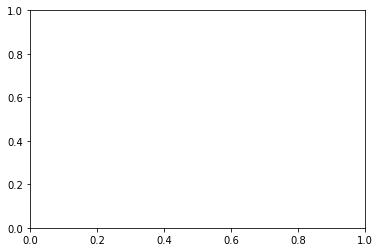

In [ ]:
countries_regular_copy = ['Belgium', 'England','France', 'Germany', 'Greece', 'Italy', 'Netherlands', 'Portugal',
                     'Scotland', 'Spain']
#plt.gca().set_color_cycle(['brown', 'red', 'blue', 'yellow', 'violet', 'green', 'orange', 'maroon', 'gold', 'brown'])
k = len(loss_list[0])
print(k)
for loss in loss_list:
    plt.plot(k, loss)

plt.legend(countries_regular_copy, loc = 'upper left')